escudoUnal (3).svg

# Taller 4: Ontologias

## Instalacion de dependencias

In [ ]:
!pip install rdflib
!pip install owlrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.1 MB/s eta 0:00:00


## Ejemplo estructura y sintaxis

In [ ]:
from re import S
from rdflib import Graph

# Creamos un grafografo
g = Graph()

# Leemos un grafo desde el internet
g.parse("http://www.w3.org/People/Berners-Lee/card")

# Vamos a recorrer el contenido en tripletas (subj, pred, obj)
for subj, pred, obj in g:
    # Check if there is at least one triple in the Graph
    print(subj, '-', pred, '-', obj)

# Imprimimos el grafo en formato RDF Turtle
print("\nGrafo serializado\n")
print(g.serialize(format="turtle"))

https://www.w3.org/People/Berners-Lee/card#i - http://www.w3.org/2000/01/rdf-schema#label - Tim Berners-Lee
https://www.w3.org/People/Berners-Lee/card#i - http://xmlns.com/foaf/0.1/img - https://www.w3.org/Press/Stock/Berners-Lee/2001-europaeum-eighth.jpg
https://www.w3.org/People/Berners-Lee/card#i - http://www.w3.org/1999/02/22-rdf-syntax-ns#type - http://www.w3.org/2000/10/swap/pim/contact#Male
n7d77ccb510f64e0ba929f914a7283353b3 - http://www.w3.org/2000/10/swap/pim/contact#postalCode - 02139
https://www.w3.org/People/Berners-Lee/card#i - http://www.w3.org/ns/solid/terms#profileBackgroundColor - #ffffff
https://www.w3.org/People/Berners-Lee/card#i - http://www.w3.org/ns/solid/terms#profileHighlightColor - #00467E
http://www.ecs.soton.ac.uk/~dt2/dlstuff/www2006_data#panel-panelk01 - http://www.w3.org/2000/10/swap/pim/contact#participant - https://www.w3.org/People/Berners-Lee/card#i
https://www.w3.org/People/Berners-Lee/card#i - http://xmlns.com/foaf/0.1/nick - timbl
https://timbl.co

## Ejercicios

## Ejercicio 1

En formato turtle represente la siguiente tabla asociada al recurso 1984, complete con la solución en la variable `libro`

| ISBN         | Titulo               | Autor            | Paginas | Edición  | Editorial        | Año publicación | Idioma  |
|--------------|----------------------|------------------|---------|----------|------------------|-----------------|---------|
| 9780143127741 | 1984                 | George Orwell    | 328     | Primera | Penguin Books    | 2013            | Ingles  |

In [ ]:
libro = """
@prefix book: <http://book.org/>.

book:Hamlet
book:ISBN 9780143127741;
book:Titulo "1984";
book:Autor "George Orwel";
book:Edicion "Primera";
book:Editorial "Penguin Books";
book:publicacion "2013";
book:idioma "Ingles";
book:Paginas 328.
"""

Nota: Valide la sintaxis, generando una imagen del grafo de la ontologia usando la herramienta de [RDF Grapher](https://www.ldf.fi/service/rdf-grapher)

### Ejercicio 2

Con ayuda de RDFLib construya una ontologia basica junto a sus propiedades usando los datos disponibles de un libro

| ISBN         | Titulo | Autor          | Paginas | Edición | Editorial     | Año publicación | Idioma |
|--------------|--------|----------------|---------|---------|---------------|-----------------|--------|
| 1613820917   | Hamlet | W. Shakespeare | 330     | N.D     | Simon and Brown | 2011            | Ingles |


In [ ]:
from rdflib import Graph, Namespace, Literal

g = Graph()

# Use este prefijo para construir su ontología
books = Namespace("http://example.org/books/")

# Solución
g.bind("books", books)
g.add((books.Hamlet, books.ISBN, Literal("1613820917")))
g.add((books.Hamlet, books.Name, Literal("Hamlet")))
g.add((books.Hamlet, books.Autor, Literal("W. Shakespeare")))
g.add((books.Hamlet, books.Paginas, Literal("330")))
g.add((books.Hamlet, books.Edicion, Literal("N.D")))
g.add((books.Hamlet, books.Editorial, Literal("Simon and Brown")))
g.add((books.Hamlet, books.AnioPublicacion, Literal("2011")))
g.add((books.Hamlet, books.Idioma, Literal("ingles")))

# Extra
print(g.serialize(format="turtle"))

@prefix books: <http://example.org/books/> .

books:Hamlet books:AnioPublicacion "2011" ;
    books:Autor "W. Shakespeare" ;
    books:Edicion "N.D" ;
    books:Editorial "Simon and Brown" ;
    books:ISBN "1613820917" ;
    books:Idioma "ingles" ;
    books:Name "Hamlet" ;
    books:Paginas "330" .




### Ejercicio 3

Usando RDFlib y nodos blancos represente la siguiente ontología

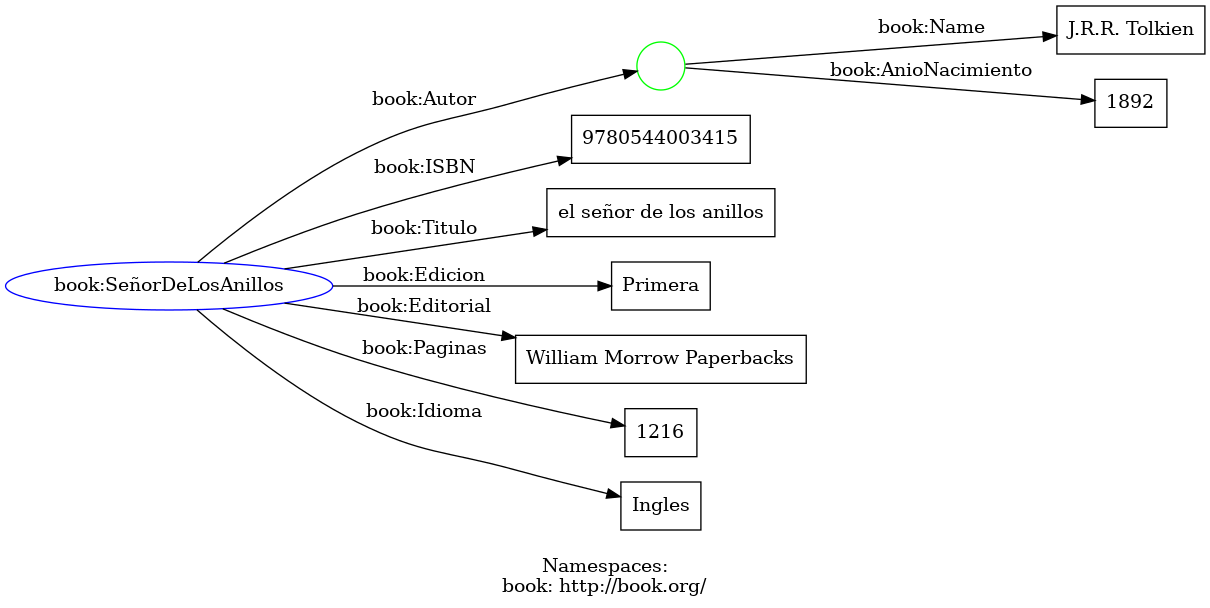

In [ ]:
from rdflib import Graph, URIRef, Literal, BNode

g = Graph()

# Solución
book = Namespace("http://example.org/books/")
Autor = BNode()

g.bind("book", book)
g.add((book.SeñorDeLosAnillos, book.ISBN, Literal("9780544003415")))
g.add((book.SeñorDeLosAnillos, book.Name, Literal("el señor de los anillos")))
g.add((book.SeñorDeLosAnillos, book.Autor, Autor))
g.add((Autor, book.Name, Literal("J.R.R. Tolkien")))
g.add((Autor, book.AnioNacimiento, Literal("1892")))
g.add((book.SeñorDeLosAnillos, book.Edicion, Literal("Primera")))
g.add((book.SeñorDeLosAnillos, book.Editorial, Literal("William Morrow Paperbacks")))
g.add((books.SeñorDeLosAnillos, books.Paginas, Literal("1216")))
g.add((book.SeñorDeLosAnillos, book.Idioma, Literal("ingles")))

#Extra
print(g.serialize())

@prefix book: <http://example.org/books/> .

book:SeñorDeLosAnillos book:Autor [ book:AnioNacimiento "1892" ;
            book:Name "J.R.R. Tolkien" ] ;
    book:Edicion "Primera" ;
    book:Editorial "William Morrow Paperbacks" ;
    book:ISBN "9780544003415" ;
    book:Idioma "ingles" ;
    book:Name "el señor de los anillos" ;
    book:Paginas "1216" .




### Ejercicio 4

Usando RDFlib y el concepto de contenedor represente que un evento tiene una
lista de invitados y una fecha, la cual está descrita por un día (lunes, martes,
miércoles, etc.) y un mes (ambos se deben escoger de una lista).
Use el grafico como guía
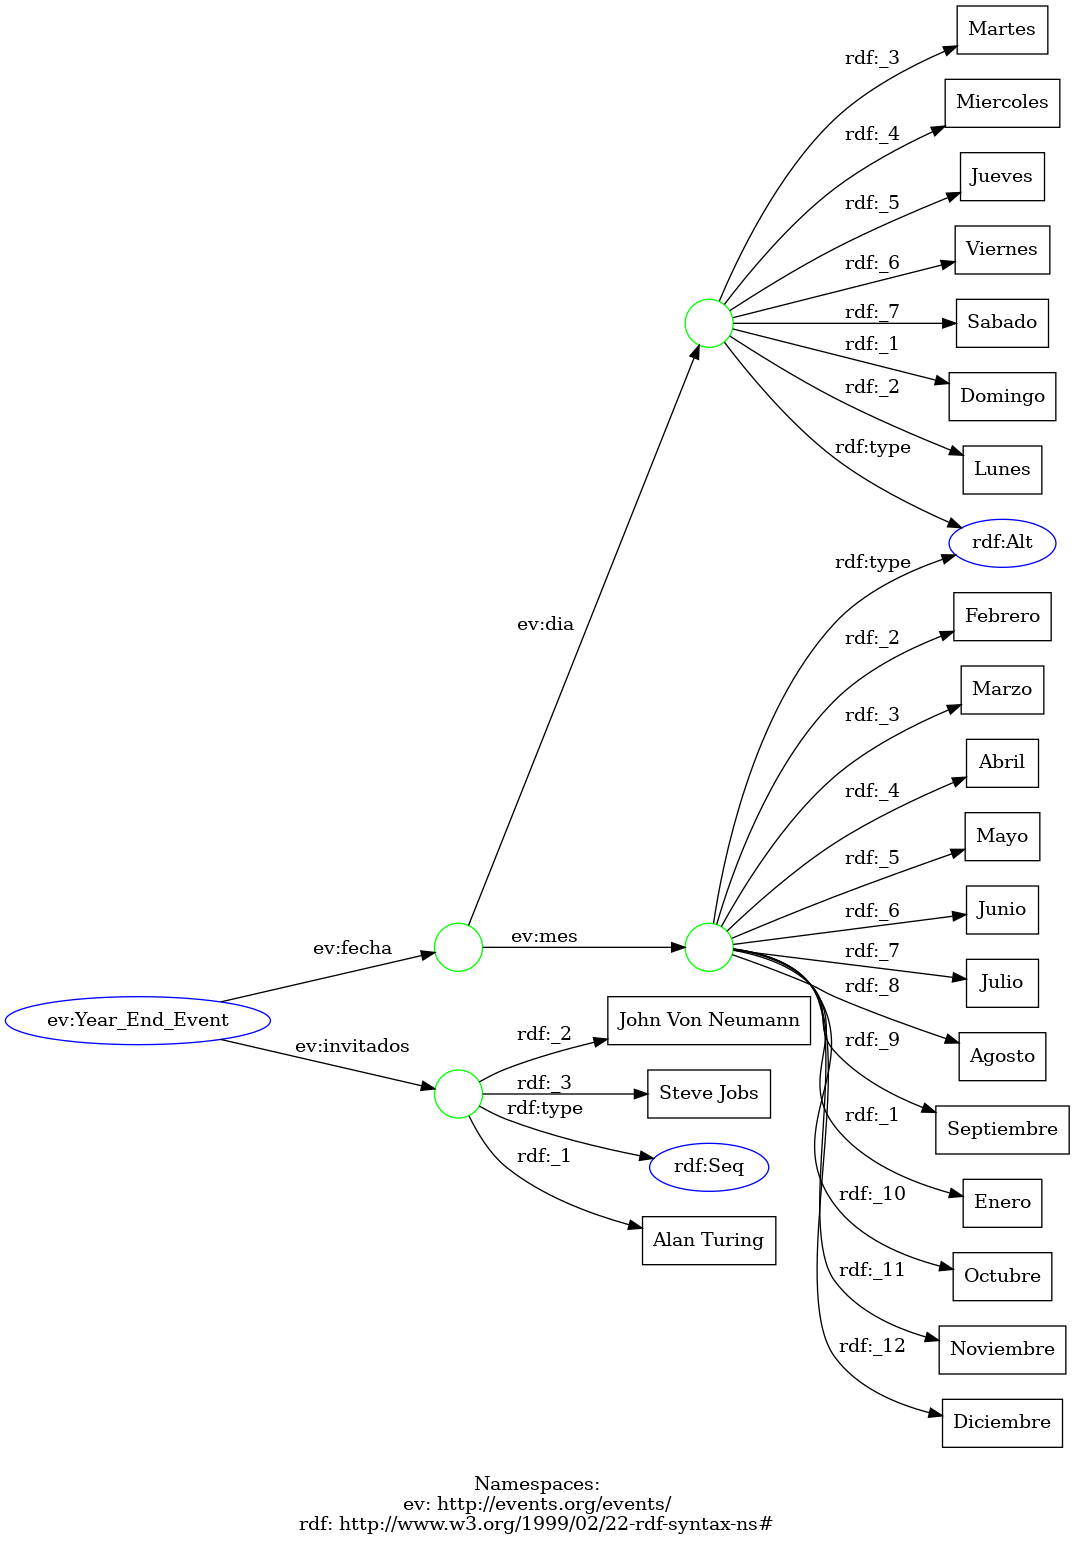


In [ ]:
from rdflib import Graph, URIRef, Namespace, Seq, Alt, BNode, Literal

graph = Graph()

EV = Namespace("http://events.org/events/")
graph.bind("ev", EV)

# Solución
yearEvent = URIRef(EV.Year_End_Event)
nodeAux = BNode()
Seq(graph, nodeAux, [Literal("Alan Turing"), Literal("John Von Neumann"), Literal("Steve Jobs")])
graph.add((yearEvent, EV.invitados, nodeAux))
nodeFecha = BNode()
nodeAux = BNode()
Alt(graph, nodeAux, [Literal("Domingo"), Literal("Lunes"), Literal("Martes"), Literal("Miercoles"), Literal("Jueves"), Literal("Viernes"), Literal("Sabado")])
graph.add((nodeFecha, EV.dia, nodeAux))
nodeAux = BNode()
Alt(graph, nodeAux, [Literal("Enero"), Literal("Febrero"), Literal("Marzo"), Literal("Abril"), Literal("Mayo"), Literal("Junio"), Literal("Julio"), Literal("Agosto"), Literal("Septiembre"), Literal("Octubre"), Literal("Noviembre"), Literal("Diciembre")])
graph.add((nodeFecha, EV.mes, nodeAux))

graph.add((yearEvent, EV.fecha, nodeFecha))


# Extra
print(graph.serialize(format='turtle'))

@prefix ev: <http://events.org/events/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

ev:Year_End_Event ev:fecha [ ev:dia [ a rdf:Alt ;
                    rdf:_1 "Domingo" ;
                    rdf:_2 "Lunes" ;
                    rdf:_3 "Martes" ;
                    rdf:_4 "Miercoles" ;
                    rdf:_5 "Jueves" ;
                    rdf:_6 "Viernes" ;
                    rdf:_7 "Sabado" ] ;
            ev:mes [ a rdf:Alt ;
                    rdf:_1 "Enero" ;
                    rdf:_10 "Octubre" ;
                    rdf:_11 "Noviembre" ;
                    rdf:_12 "Diciembre" ;
                    rdf:_2 "Febrero" ;
                    rdf:_3 "Marzo" ;
                    rdf:_4 "Abril" ;
                    rdf:_5 "Mayo" ;
                    rdf:_6 "Junio" ;
                    rdf:_7 "Julio" ;
                    rdf:_8 "Agosto" ;
                    rdf:_9 "Septiembre" ] ] ;
    ev:invitados [ a rdf:Seq ;
            rdf:_1 "Alan Turing" ;
       

### Ejercicio 5

Retome el ejercicio 4 y represente que el evento adicionalmente tiene
los siguientes empleados representados como colecciones: meseros y ayudantes.
Agregue 2 meseros y 2 ayudantes.
Use el grafico como guía
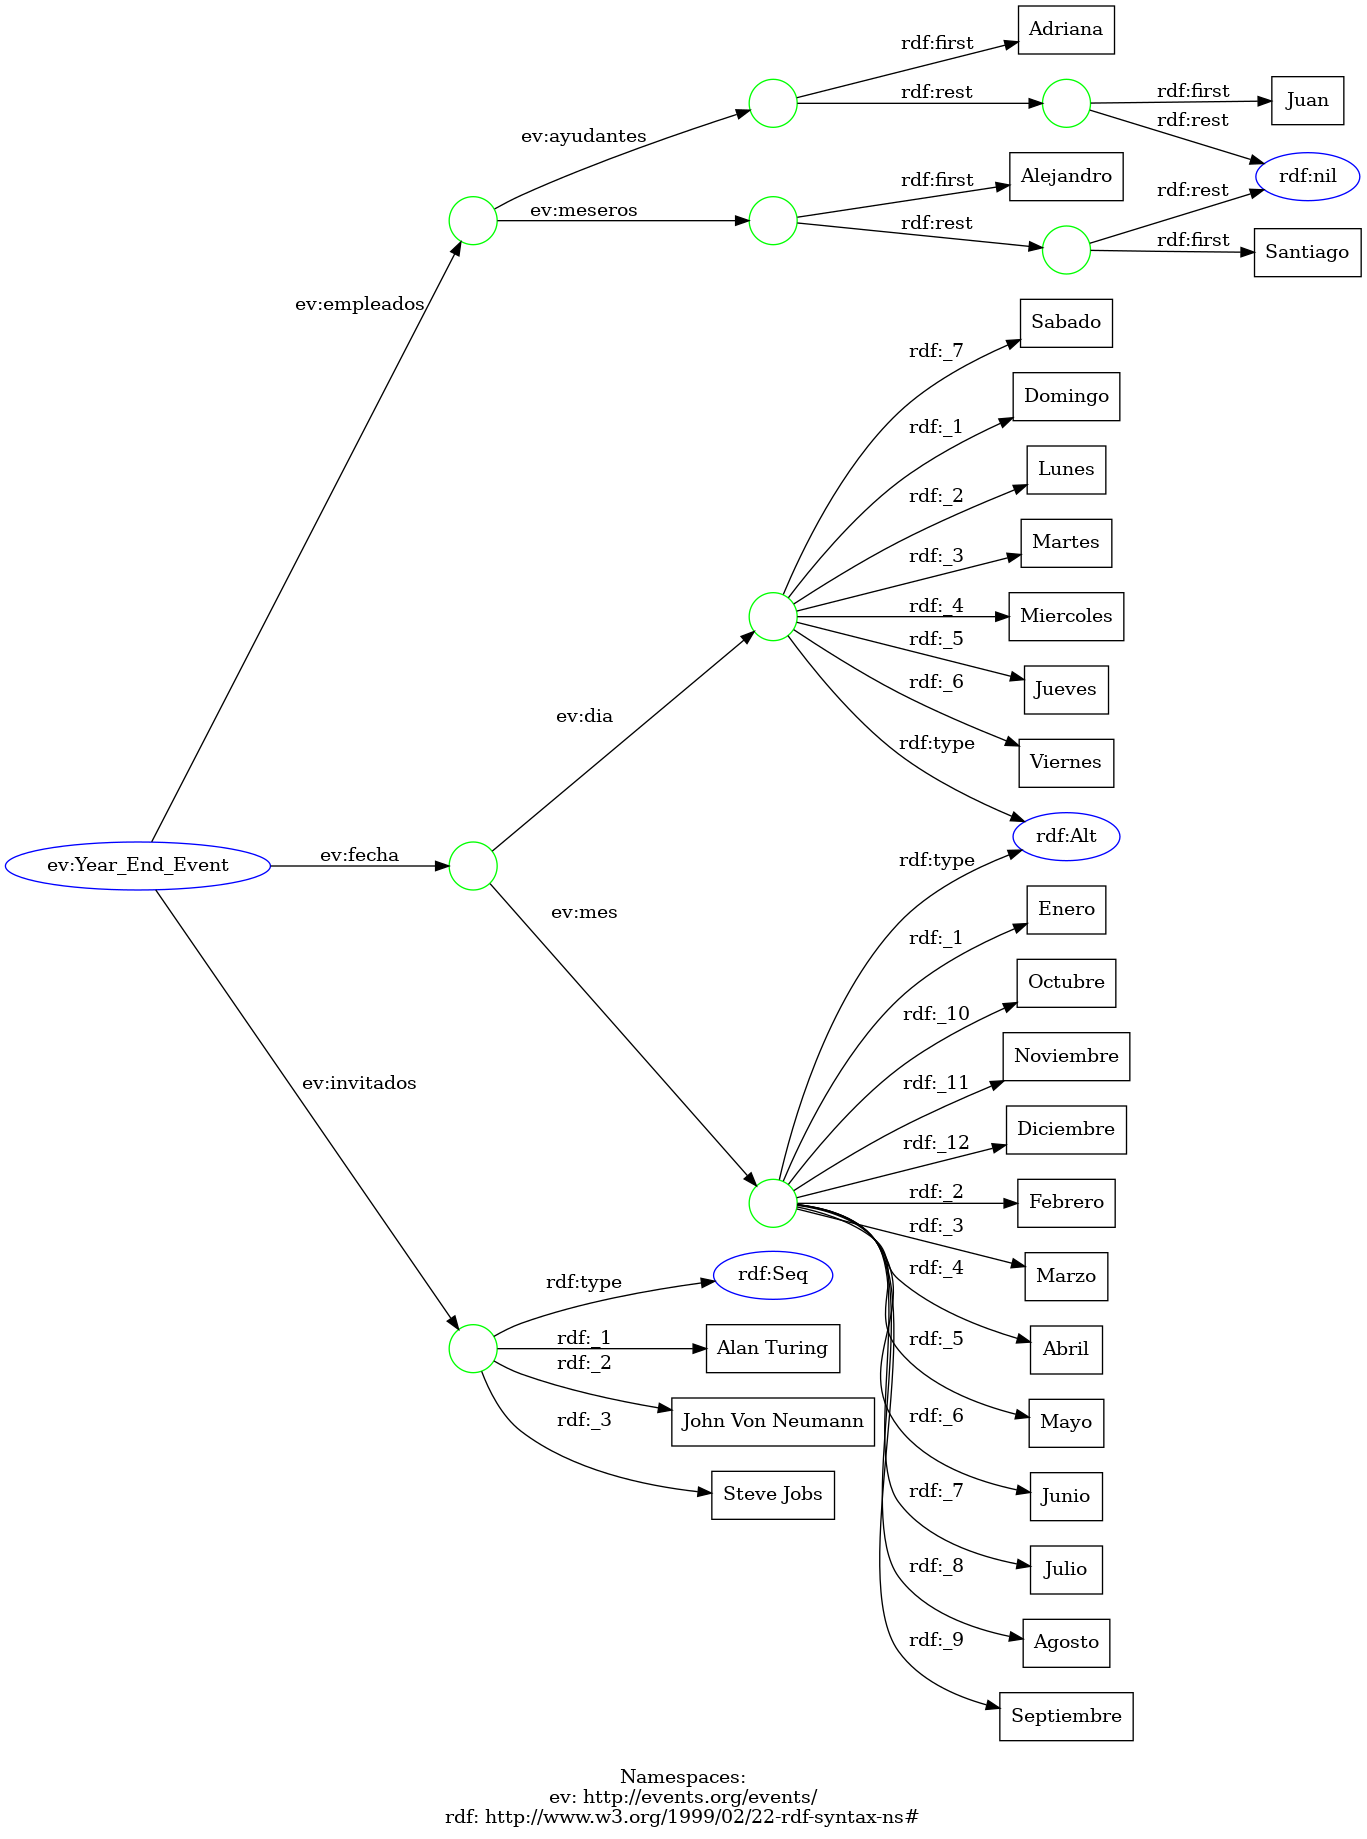

In [ ]:
from rdflib.collection import Collection

graph
nodeEmpleados = BNode()
nodeAux = BNode()
Collection(graph, nodeAux, [Literal("Alejandro"), Literal("Santiago")])
graph.add((nodeEmpleados, EV.meseros, nodeAux))
nodeAux = BNode()
Collection(graph, nodeAux, [Literal("Adriana"), Literal("Juan")])
graph.add((nodeEmpleados, EV.ayudantes, nodeAux))
graph.add((yearEvent, EV.empleados, nodeEmpleados))

# Extra
print(graph.serialize(format='turtle'))

@prefix ev: <http://events.org/events/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

ev:Year_End_Event ev:empleados [ ev:ayudantes ( "Adriana" "Juan" ) ;
            ev:meseros ( "Alejandro" "Santiago" ) ] ;
    ev:fecha [ ev:dia [ a rdf:Alt ;
                    rdf:_1 "Domingo" ;
                    rdf:_2 "Lunes" ;
                    rdf:_3 "Martes" ;
                    rdf:_4 "Miercoles" ;
                    rdf:_5 "Jueves" ;
                    rdf:_6 "Viernes" ;
                    rdf:_7 "Sabado" ] ;
            ev:mes [ a rdf:Alt ;
                    rdf:_1 "Enero" ;
                    rdf:_10 "Octubre" ;
                    rdf:_11 "Noviembre" ;
                    rdf:_12 "Diciembre" ;
                    rdf:_2 "Febrero" ;
                    rdf:_3 "Marzo" ;
                    rdf:_4 "Abril" ;
                    rdf:_5 "Mayo" ;
                    rdf:_6 "Junio" ;
                    rdf:_7 "Julio" ;
                    rdf:_8 "Agosto" ;
          

### Ejercicio 6

Construir la siguientes estructura de herencia usando RDF y RDFS

Cree una ontologia que contenga las clases Persona, Actor,
Personaje y Película. En donde Personaje desciende de Actor el cual a su vez desciende de Persona.

Agregue tambien los siguientes...
Representar que una película "tiene" personajes y que además un actor "interpreta" personajes. Represente que una persona tiene "anioNacimiento", esta a su vez desciende de la propiedad "anio" y este tiene un "rango de tipo números", añada otra propiedad que describa que una Persona, tiene "amigos" que también son de tipo Persona. También describa que Persona y Película tiene "nombre", y el valor esperado "es un string".

In [ ]:
from rdflib import Graph, Namespace, Literal, XSD
from rdflib.namespace import RDF, RDFS
g = Graph()
st = Namespace("http://estructura.org/")
g.bind("st", st)


# Agregar las clases y propiedades al grafo
g.add((st.Persona, RDF.type, RDFS.Class))
g.add((st.Actor, RDF.type, RDFS.Class))
g.add((st.Personaje, RDF.type, RDFS.Class))
g.add((st.Pelicula, RDF.type, RDFS.Class))

# Definir relaciones entre clases
g.add((st.Actor, RDFS.subClassOf, st.Persona))
g.add((st.Personaje, RDFS.subClassOf, st.Actor))

# Definir propiedades
g.add((st.personajes, RDF.type, RDF.Property))
g.add((st.personajes, RDFS.domain, st.Pelicula))
g.add((st.personajes, RDFS.range, st.Personaje))

g.add((st.interpretado, RDF.type, RDF.Property))
g.add((st.interpretado, RDFS.domain, st.Personaje))
g.add((st.interpretado, RDFS.range, st.Actor))

g.add((st.anio, RDF.type, RDF.Property))
g.add((st.anio, RDFS.range, XSD.integer))

g.add((st.nombre, RDF.type, RDF.Property))
g.add((st.nombre, RDFS.range, XSD.string))
g.add((st.nombre, RDFS.domain, st.Persona))
g.add((st.nombre, RDFS.domain, st.Pelicula))

g.add((st.anio_nacimiento, RDF.type, RDF.Property))
g.add((st.anio_nacimiento, RDFS.subPropertyOf, st.anio))
g.add((st.anio_nacimiento, RDFS.domain, st.Persona))

g.add((st.amigo, RDF.type, RDF.Property))
g.add((st.amigo, RDFS.domain, st.Persona))
g.add((st.amigo, RDFS.range, st.Persona))

# Extra
print(g.serialize(format='turtle'))

@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix st: <http://estructura.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

st:Actor a rdfs:Class ;
    rdfs:subClassOf st:Persona .

st:Pelicula a rdfs:Class .

st:Persona a rdfs:Class .

st:Personaje a rdfs:Class ;
    rdfs:subClassOf st:Actor .

st:amigo a rdf:Property ;
    rdfs:domain st:Persona ;
    rdfs:range st:Persona .

st:anio_nacimiento a rdf:Property ;
    rdfs:domain st:Persona ;
    rdfs:subPropertyOf st:anio .

st:interpretado a rdf:Property ;
    rdfs:domain st:Personaje ;
    rdfs:range st:Actor .

st:nombre a rdf:Property ;
    rdfs:domain st:Pelicula,
        st:Persona ;
    rdfs:range xsd:string .

st:personajes a rdf:Property ;
    rdfs:domain st:Pelicula ;
    rdfs:range st:Personaje .

st:anio a rdf:Property ;
    rdfs:range xsd:integer .




### Ejercicio 7

Cargue el archivo `libros.ttl` y realice programaticamente las siguientes consultas:

- Realice una consulta para obtener los nombres de autores en la ontologia

- Realice una consulta para obtener los nombres de libros en la ontologia

- Realice una consulta para encontrar el nombre del autor del quijote

In [ ]:
import rdflib
g = rdflib.Graph()


## respuesta
g.parse("libros.ttl", format="ttl")

## Consulta 1
for s, p, o in g:
  if str(p) == "http://www.books.org/tieneNombre":
    print(o)

## Consulta 2
for s, p, o in g:
  if str(p) == "http://www.books.org/titulo":
    print(o)

## Consulta 3
for s, p, o in g:
  if str(p) == "http://www.books.org/esAutorDe" and str(o) == "http://www.books.org/ElQuijote":
    for s1, p1, o1 in g:
      if str(s) == str(s1) and str(p1) == "http://www.books.org/tieneNombre":
        print(o1)

María López
Juan Pérez
Gabriel García Márquez
Jorge Luis Borges
La Sombra del Viento
Cien Años de Soledad
Don Quijote de la Mancha
Ficciones
Juan Pérez


### Ejercicio 8

Ejecute el codigo y responda:

- ¿Qué tripletas nuevas se generaron?

In [ ]:
from rdflib import Graph, RDF, RDFS, OWL, Namespace
import owlrl


g = Graph()

n = Namespace("http://example.org/")

# Añadir clases y relaciones
g.add((n.John, RDF.type, n.Human))
g.add((n.Human, RDF.type, RDFS.Class))
g.add((n.Mammal, RDF.type, RDFS.Class))
g.add((n.Human, RDFS.subClassOf, n.Mammal))

# Definir una propiedad con dominio y rango
g.add((n.hasChild, RDF.type, RDF.Property))
g.add((n.hasChild, RDFS.domain, n.Human))
g.add((n.hasChild, RDFS.range, n.Human))

g.add((n.hasSibling, RDF.type, RDF.Property))
g.add((n.hasSibling, RDFS.domain, n.Human))
g.add((n.hasSibling, RDFS.range, n.Human))
g.add((n.hasSibling, RDFS.subPropertyOf, n.hasChild))

# Relacionar a John con su hijo Jane y con su hermano Mark
g.add((n.John, n.hasChild, n.Jane))
g.add((n.John, n.hasSibling, n.Mark))

## Aplicar razonamiento
owlrl.DeductiveClosure(owlrl.RDFS_Semantics).expand(g)


print("Resultado:")

for subject, predicate, obj in g:
  if str(obj) != "http://www.w3.org/2000/01/rdf-schema#Resource":
    print(f"{subject} {predicate} {obj}")


Resultado:
http://example.org/John http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/Human
http://www.w3.org/2000/01/rdf-schema#subPropertyOf http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://example.org/Human http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2000/01/rdf-schema#Class
http://example.org/hasSibling http://www.w3.org/2000/01/rdf-schema#subPropertyOf http://example.org/hasChild
http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2000/01/rdf-schema#subPropertyOf http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://example.org/hasChild http://www.w3.org/2000/01/rdf-schema#range http://example.org/Human
http://www.w3.org/2000/01/rdf-schema#subPropertyOf http://www.w3.org/2000/01/rdf-schema#subPropertyOf http://www.w3.org/2000/01/rdf-schema#subPropertyOf
http://example.org/hasSibling http://www.w3.org/2000/01/rdf-schema#domain http://example.org/Human
http://example.org/Ja

### Ejercicio 9

Teniendo en cuenta el resultado del grafo anterior, realice una consulta que obtenga todos los recursos que sean de tipo Mammal

In [ ]:
## Respuesta
for s, p, o in g:
  if p == RDF.type and str(o) == "http://example.org/Mammal":
    print(s)

http://example.org/Jane
http://example.org/Mark
http://example.org/John


### Ejercicio 10

En una ontología académica se definen las siguientes relaciones:

- `Profesor` y `Estudiante` son subclases de `Persona`.  
- `CursoAvanzado` es una subclase de `Curso`.  
- La propiedad `enseñaCurso` tiene como **dominio `Profesor`** y **rango `Curso`**.  
- La propiedad `asisteCurso` tiene como **dominio `Estudiante`** y **rango `Curso`**.  
- Tanto `enseñaCurso` como `asisteCurso` son subpropiedades de `participaEnCurso`.

Se sabe que:

- `María` enseña el curso `CursoML`.  
- `Luis` asiste al curso `CursoML`.  
- `CursoML` es un `CursoAvanzado`.

---

### Instrucciones

Usando razonamiento RDFS, infiera todas las tripletas adicionales que pueden deducirse automáticamente del esquema y los datos proporcionados.


In [ ]:
from rdflib import Graph, Namespace, RDF, RDFS
from owlrl import DeductiveClosure, RDFS_Semantics

g = Graph()
EX = Namespace("http://example.org/")
g.bind("ex", EX)

g.add((EX.Profesor, RDFS.subClassOf, EX.Persona))
g.add((EX.Estudiante, RDFS.subClassOf, EX.Persona))
g.add((EX.CursoAvanzado, RDFS.subClassOf, EX.Curso))

g.add((EX.enseñaCurso, RDFS.domain, EX.Profesor))
g.add((EX.enseñaCurso, RDFS.range, EX.Curso))
g.add((EX.asisteCurso, RDFS.domain, EX.Estudiante))
g.add((EX.asisteCurso, RDFS.range, EX.Curso))

g.add((EX.enseñaCurso, RDFS.subPropertyOf, EX.participaEnCurso))
g.add((EX.asisteCurso, RDFS.subPropertyOf, EX.participaEnCurso))

g.add((EX.Maria, EX.enseñaCurso, EX.CursoML))
g.add((EX.Luis, EX.asisteCurso, EX.CursoML))
g.add((EX.CursoML, RDF.type, EX.CursoAvanzado))

# Mostrar tripletas iniciales
print("=== Tripletas iniciales ===")
for s, p, o in g:
    print(f"{s} {p} {o}")

# Aplicar razonamiento RDFS
DeductiveClosure(RDFS_Semantics, axiomatic_triples=True, datatype_axioms=False).expand(g)

# Mostrar tipos inferidos
print("\n=== Tipos inferidos ===")
for s, p, o in g.triples((None, RDF.type, None)):
    print(f"{s} {p} {o}")

# Mostrar relaciones participaEnCurso inferidas
print("\n=== Relaciones participaEnCurso inferidas ===")
for s, p, o in g.triples((None, EX.participaEnCurso, None)):
    print(f"{s} {p} {o}")

=== Tripletas iniciales ===
http://example.org/asisteCurso http://www.w3.org/2000/01/rdf-schema#range http://example.org/Curso
http://example.org/asisteCurso http://www.w3.org/2000/01/rdf-schema#domain http://example.org/Estudiante
http://example.org/CursoML http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/CursoAvanzado
http://example.org/asisteCurso http://www.w3.org/2000/01/rdf-schema#subPropertyOf http://example.org/participaEnCurso
http://example.org/Luis http://example.org/asisteCurso http://example.org/CursoML
http://example.org/Maria http://example.org/enseñaCurso http://example.org/CursoML
http://example.org/enseñaCurso http://www.w3.org/2000/01/rdf-schema#subPropertyOf http://example.org/participaEnCurso
http://example.org/Estudiante http://www.w3.org/2000/01/rdf-schema#subClassOf http://example.org/Persona
http://example.org/enseñaCurso http://www.w3.org/2000/01/rdf-schema#domain http://example.org/Profesor
http://example.org/enseñaCurso http://www.w3.org/20